In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import scipy as sp
from scipy.stats import mode

%matplotlib inline

# Introduction

In this notebook, a numerical approach is implemented to demonstrate the thesis that, if we can program a computer then we have a direct access to the fundemental and deepest ideas in Statistics. To examine this thesis, a statistical argument is needed. The problem of choice is a study inivestigating the effect of beer consumption on human attractiveness to malarial mosquitoes.

The experiment consisted of two independent groups that were exposed to mosquitoes using Y-tube aparatrus. The first group is formed of 25 male participants that consumed one litre of beer and another of 18 male participants that consumed one litre of water. The participant sat in a tent for 15 minutes shirtless. A fan pumped volunteers' body odour into one of the forks and air into the other fork of the Y-shaped tube. Downstream, a batch of 50 mosquitoes are realeased. The mosquito vectors flew and were trapped when landed at the end of the forks.The data represents the number of trapped mosquitoes based on the participants drink. 

Beer = [27.  19.  20.  20.  23.  17.  21.  24.  31.  26.  28.  20.  27.  19.  25. 31.  24.  28.  24. 29. 21. 21. 18. 27.  20.]

Water =  [21.  19.  13.  22.  15.  22.  15.  22.  20.  12.  24.  24.  21.  19.  18. 16.  23.  20.]


The difference between the two mean sample is computed and is found to be approximately 4.4 which is interpreted as the average person who drinks beer attracts 4.4 more mosquitoes than the average person who drinks water. This statement raises two argument that perhaps beer consumption has no effect and 4.4 aditional mosquitoes is small difference and could have just happened by chance; contrarily the mean difference of 4.4 is sufficiently large and it could not have happened by chance.
To settle this argument, statistical analysis is performed using first a statistical analytical approach and second using a numerical computational approach.

# Statistic Analytic Approch

## Data

Beer  =  [27.  19.  20.  20.  23.  17.  21.  24.  31.  26.  28.  20.  27.  19.  25. 31.  24.  28.  24. 29. 21. 21. 18. 27.  20.]

Water = [21.  19.  13.  22.  15.  22.  15.  22.  20.  12.  24.  24.  21.  19.  18. 16.  23.  20.]

Generally, Welch t-test is performed to investigate the hypothesis that the two populations with unequal variance and sample sizes have equal means. It is typically applied when the statistical units underlying the two samples being compared are non-overlapping. is test starts by defining the Null Hypothesis $\mathit{{H_{0}}}$ and the Alternative Hypothesis $\mathit{{H_{1}}}$ as follows,

$${H_0: \bar{X_1} = \bar{X_2}\hspace{5cm} H_1: \bar{X_1} \neq \bar{X_2} }$$

The t-statistic value. $t_s$ using is calculated,
$$\large t_s = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{  \frac{{s^2_1}}{n_1} +\frac{{s^2_2}}{n_2}   }} $$
where $s{_i^2}, n_{i}$ represent the sample variance and the sample size respectively.

The degree of freedom $\nu$ is calculated using,
$$ \nu \approx \large \frac{\left(\frac{{s^2_1}}{n_1} +\frac{{s^2_2}}{n_2}\right)^2}{\left(\frac{s^2_1}{n_1}\right)^2\left(n_1 -1\right) + \left(\frac{{s^2_2}}{n_2}\right)^2\left(n_2 -1\right) }   $$

We compute the t-statistic $t_s$ and the degree freedom $\nu$. The critical value of the t-test, $t_c$ is obtained from the corresponding test table using the degree of freedom and it was found that  $t_s > t_c$


Therefore, a difference $\bar{X_1}-\bar{X_2} \approx 4.4$  in additional mosquitos is statistically significant within 95% confidence interval. Thus, Beer Consumption Increases Human Attractiveness to Malarial Mosquitoes

## Welch's test in python 

In [2]:
data = pd.read_excel('./data/Mosquito_data.xlsx')
xBeer  = np.array(data['Beer'][:25],dtype=float)
xWater = np.array(data['Water'][:18],dtype=float)
nB = len(xBeer)
nW = len(xWater)

In [3]:
ttest = sp.stats.ttest_ind(xBeer,xWater,axis=0,equal_var=False)
print "t-value = ", ttest.statistic
print "probability value = ", ttest.pvalue

t-value =  3.65824453972
probability value =  0.000747401907904


# Numerical Approach 

The argument posed earlier can be settled using a different approach. Under the assumption that the mean difference of 4.4 additional mosquitos could have happened due to chance, then the data is considered as labels with no relevant meaning and carry no information. Thus, the data can be shuffled randomly and the mean difference of the two sample can be computed.
Repeating this process many iteration allows the build of the sampling distribution under this argument. The implementation is as follows:

In [4]:
def my_shuffle(array):      # shuffle the full data at random
    random.shuffle(array)
    return array

def my_split(array,split):   # split the array into two arrays 
    x1 = array[:split]
    x2 = array[split:] 
    return x1,x2

def my_meandiff(x1,x2):      # Compute the mean difference of two arrays                  
    mean1 = x1.mean()
    mean2 = x2.mean()
    result = (mean1-mean2)
    return  result

def my_runs(runs,X,nb=25):   # Collect the mean difference of multiple runs                  
    Means = np.zeros(runs)
    for i in range(runs):
        s = my_shuffle(X)
        x1,x2 = my_split(s,nB)
        meanDiff = my_meandiff(x1,x2)
        Means[i] = meanDiff
    return Means

def check_prop(run):         # check proportion of mean difference    
    result = my_runs(run,X) 
    test = result[result>meanOriginal]
    alpha =  len(test)
    return alpha

In [5]:
X = np.concatenate((xBeer,xWater))

In [6]:
meanOriginal = my_meandiff(xBeer,xWater)
print "The mean difference of the two samples beer and" \
       " water is", meanOriginal

The mean difference of the two samples beer and water is 4.37777777778


In [7]:
# Initializing an array that contains different runs 
run_array =np.array([500, 1000, 2500, 5000, 7500, 10000, 25000, 50000])
print run_array

[  500  1000  2500  5000  7500 10000 25000 50000]


In [8]:
propList = np.zeros(len(run_array))
for i in range(len(run_array)):
    propList[i] = check_prop(run_array[i])
    print str(i+1)+ ")" + " The proportion of having a mean difference" \
          " more than 4.37 \n of random shuffle ran " + str(run_array[i]) \
            + " is ", propList[i]/run_array[i]

1) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 500 is  0.0
2) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 1000 is  0.001
3) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 2500 is  0.0004
4) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 5000 is  0.0
5) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 7500 is  0.0004
6) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 10000 is  0.0003
7) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 25000 is  0.00044
8) The proportion of having a mean difference more than 4.37 
 of random shuffle ran 50000 is  0.00038


#### Illustration of the unfolding of the sampling distribution under the argument that the mean difference of 4.4 occured due to chance. 

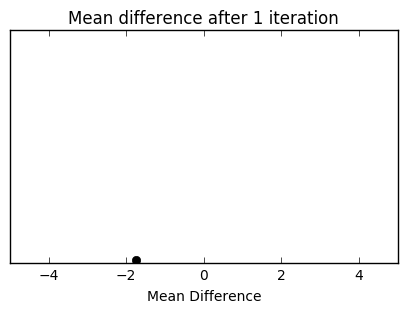

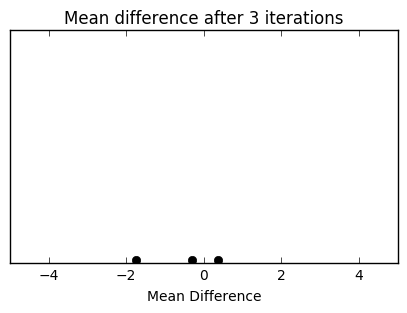

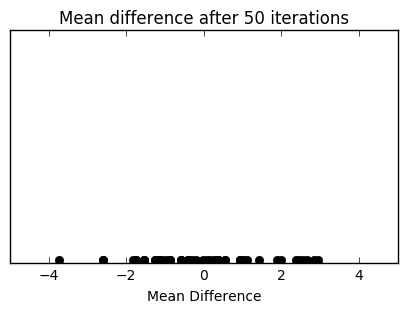

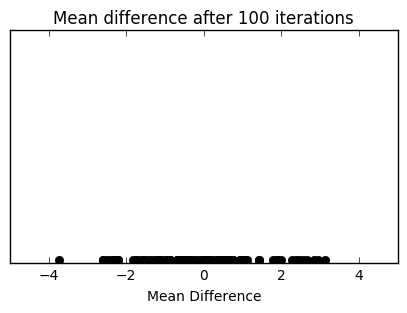

In [9]:
plotRun = 50000
result = my_runs(plotRun,X) 
count = np.array([1,3,50, 100])
m = len(count)
k = 0

for i in count:
    ysp = np.zeros(i)
    plt.figure(figsize=[5,3])
    plt.plot(result[:i],ysp,'ko')
    plt.axis([-5,5,-.005,.5])
    plt.xlabel('Mean Difference',fontsize=10)
    plt.yticks([])
    #plt.ylabel('Frequency',fontsize=10)
    if i == 1:
        plt.title('Mean difference after '+ str(i) + ' iteration',fontsize=12)
    else:
        plt.title('Mean difference after '+ str(i) + ' iterations',fontsize=12)
    name = 'testp'+ str(k)
    path = '../Paper/Figures/'+name
    k += 1
    #plt.savefig(path,ext='png',close=True,verbose=True)
    plt.show() 

#### Illustration of the sampling distribution under the argument that the mean difference of 4.4 occured due to chance after 50000 iteration. 

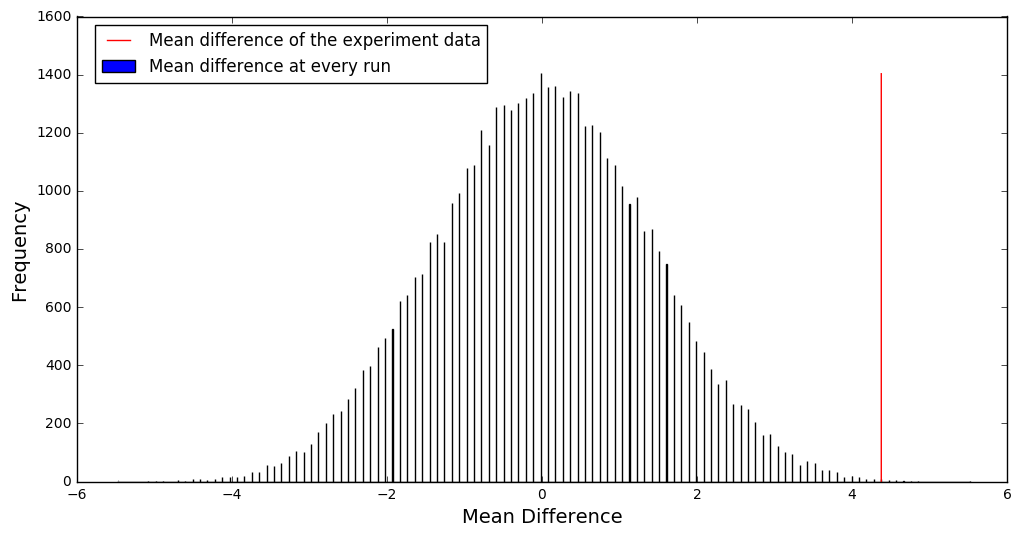

In [10]:
numBin = np.ceil(plotRun/2)
numBin = int(numBin)
moder = mode(result).count
plt.figure(figsize=[12,6])
plt.hist(result,bins=numBin,label='Mean difference at every run')
plt.plot(meanOriginal*np.ones(moder),range(moder),'r', label='Mean difference of the experiment data')
plt.xlabel('Mean Difference',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
#plt.title('Distribution of mean difference when data shuffled randomnly iterated '+ str(plotRun) + ' times \n',fontsize=16)
plt.legend(bbox_to_anchor=(0.45, 1.0))
#plt.savefig('../Paper/Figures/Distribution_50k',ext='png',close=True,verbose=True)
plt.show()

#### Illustration of the proportion of obtaining a mean difference of 4.4 as afunction of number of iterations

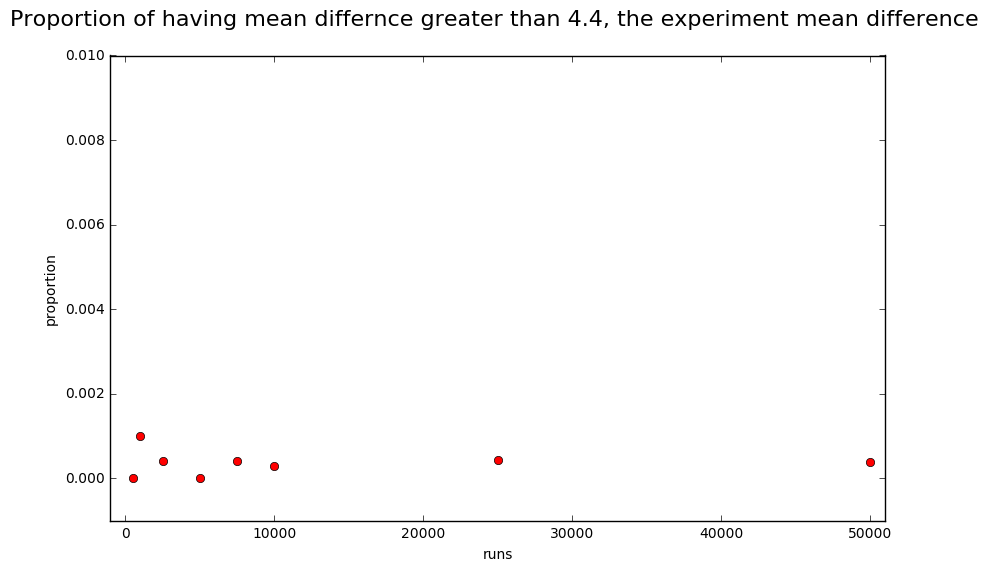

In [11]:
alpha = propList/run_array
plt.figure(figsize=[10,6])
plt.plot(run_array,alpha,'ro')
plt.xlabel('runs',fontsize=10)
plt.ylabel('proportion',fontsize=10)
plt.axis([-1000,run_array[-1]+1000, -0.001 , .01])
plt.title('Proportion of having mean differnce greater than 4.4, the experiment mean difference \n', fontsize=16)
#plt.savefig('../Paper/Figures/proportion',ext='png',close=True,verbose=True)
plt.show()

In [12]:
print propList                 # number of time that a mean difference of 4.4 occured 
print run_array                # number of runs
print propList/run_array       # proportion of the mean difference occurence in a run

[  0.   1.   1.   0.   3.   3.  11.  19.]
[  500  1000  2500  5000  7500 10000 25000 50000]
[ 0.       0.001    0.0004   0.       0.0004   0.0003   0.00044  0.00038]


Under the assumption of the data is meaningless and can be considered as label, the sample distribution is genrated. The conclusion that we can draw that the mean difference of 4.4 is extremely unlikely to happen as shown, leading to safely reject this assumption. This conclusion aligns and support the analytical statistical analysis. Thus, beer consuption increases human attractiveness to malarial mosquitoes.

# Conclusion 

The numerical approach implemented is based on three main techniques and tools, and it is required to be able follow three essential things.

1) Ability to follow a simple logic argument

2) Ability to generate random number. 

3)  Ability to repeat a process i.e. iteration.

The first tool is acquired due to humans nature because humans uses logic as a unified language. The two following tools exist in any programming language with a decent library. Using these three simple tools and techniques, it is possible to understand the problem at a high level without using the analytical approach that requires years of studies to understand it.
